In [1]:
import jax
from cft import *
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm
import optax
from jax import jit, vmap, lax, grad, jacfwd

from functools import partial

from scipy import optimize

jax.config.update("jax_enable_x64", True)
jnp.set_printoptions(precision=20)

from matplotlib.pyplot import cm

"""from jax.config import config
config.update("jax_debug_nans", True)"""

'from jax.config import config\nconfig.update("jax_debug_nans", True)'

In [33]:
import sys
sys.path.append("/home/davep96/anaconda3/envs/conf_boot/lib/python3.7/site-packages")

In [106]:
def boots(beta,c, params, opt_fn, opt_state, steps=100):
    """ finds deltas

        Params:
        beta - random point for beta
        c - central charge
        deltas - intitialised deltas
        opt_fn - optimization function e.g. Adam
        opt_state - initial state

        Returns:
        losses, deltas, state

    """
    @jit
    def loss_function(params):
        identy = vmap(vmap(reduced_partition_function_spinless, in_axes=(None, 0, None), out_axes=0),in_axes=(0, None, None), out_axes=0)(params, beta, c)
        transformed = vmap(vmap(reduced_partition_function_spinless, in_axes=(None, 0, None), out_axes=0),in_axes=(0, None, None), out_axes=0)(params, 1/beta, c)
#         print(identy.shape)
        return jnp.mean((identy-transformed)**2) # mean squared loss

    losses = []
    for _ in tqdm(range(steps)):
        # loss and gradients calulated with 
        loss, grads = jax.value_and_grad(loss_function)(params) 
        updates, opt_state = opt_fn(grads, opt_state)
        params += updates
        losses.append(loss) 

    return jnp.stack(losses), params, opt_state


100%|██████████████████████████████████████| 2000/2000 [00:09<00:00, 212.49it/s]


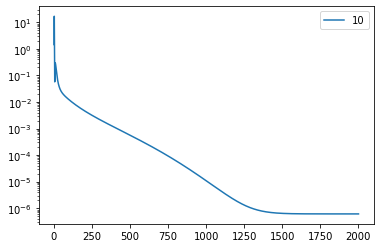

In [268]:
number_delta = 10
rng = random.PRNGKey(24)
keys = random.split(rng, 10)
batch_size = 128
params = random.uniform(keys[1], (batch_size, 2, number_delta))*100
beta_size = 3*number_delta
beta = (random.uniform(keys[0], (beta_size,))+ 0.5)* 100 
c = 1/2
step=2000

# test for different learning rates
for lr in [10]:
    params = random.uniform(keys[1], (batch_size, 2, number_delta))*2.5
    adam = optax.adam(learning_rate=lr)
    losses, params, _ = boots(beta, c, params, opt_fn=adam.update, opt_state=adam.init(params),steps=step)
    steps = np.linspace(1,step,step)
    plt.plot(steps,losses,label=f"{lr}")
    plt.yscale("log")
    plt.legend()

    # print(learned_deltas)

In [339]:
rng = random.PRNGKey(12)
key_n, *keys = random.split(rng, 3)

In [338]:
number_delta = 20
def give_params(number_delta, key_n):
    key_n, *keys = random.split(key_n, 3)
    beta_size = 3*number_delta 
    beta = (random.uniform(keys[0], (beta_size,))*3/2 + 1/2 ) * 99
    batch_size = 256
    params = (random.uniform(keys[1], (batch_size, 2, number_delta)))* 2
    c =1/2
    step=2000
    lr = 10
    # params = random.uniform(keys[1], (batch_size, 2, 6))*10

    for epoch in range(1):
        lr = lr/(10)
        adam = optax.adam(learning_rate=lr)
        losses, params, _ = boots(beta, c, params, opt_fn=adam.update, opt_state=adam.init(params),steps=step)
        steps = np.linspace(epoch*step+1,(epoch+1)*step,step)
        plt.plot(steps,losses)
        plt.yscale("log")
    return params


In [332]:
params.shape

(256, 2, 20)

In [333]:
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2)

DeviceArray(-0.0001287211179292673, dtype=float64)

100%|███████████████████████████████████████| 2000/2000 [00:23<00:00, 85.13it/s]


-0.00014610327652689998


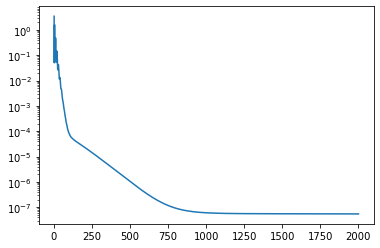

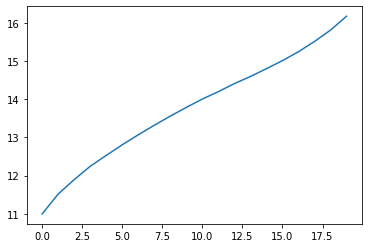

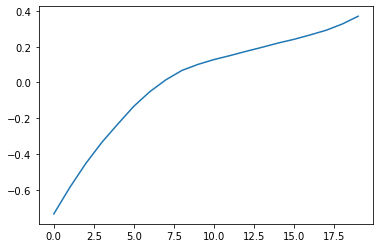

In [340]:
# 20
number_delta = 20
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

100%|███████████████████████████████████████| 2000/2000 [01:17<00:00, 25.85it/s]


-0.00013972109666628043


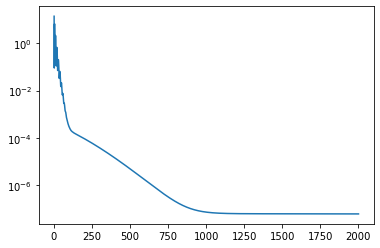

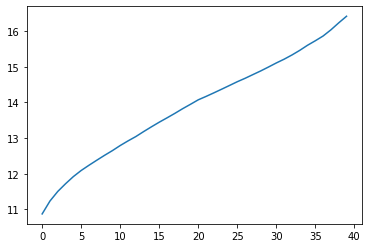

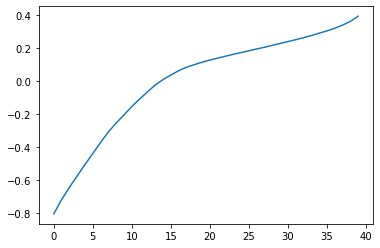

In [343]:
# 40
number_delta = 40
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

100%|███████████████████████████████████████| 2000/2000 [01:58<00:00, 16.86it/s]


-0.00024236748230197858


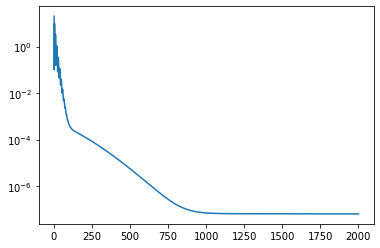

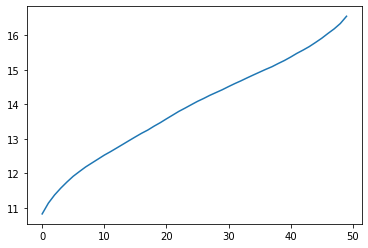

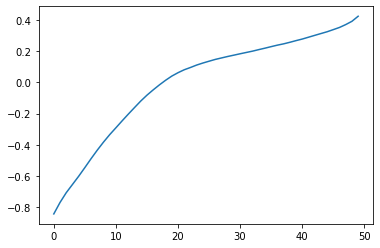

In [342]:
# 50
number_delta = 50
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

100%|███████████████████████████████████████| 2000/2000 [02:15<00:00, 14.75it/s]


-0.00015165216455303456


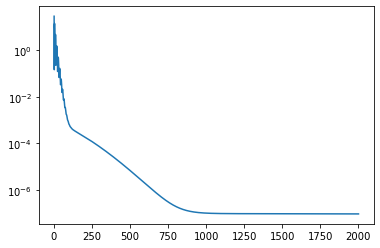

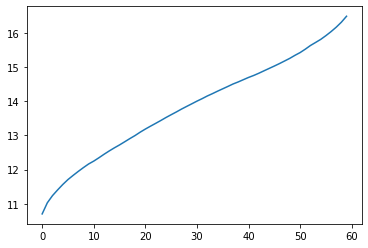

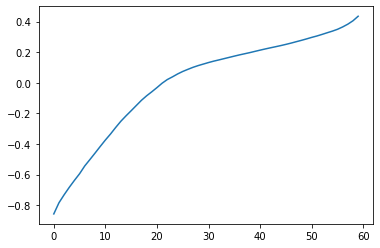

In [345]:
# 60
number_delta = 60
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

100%|███████████████████████████████████████| 2000/2000 [03:05<00:00, 10.79it/s]


-0.0001342028017428515


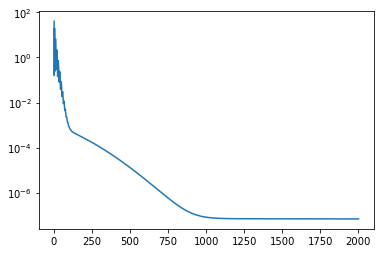

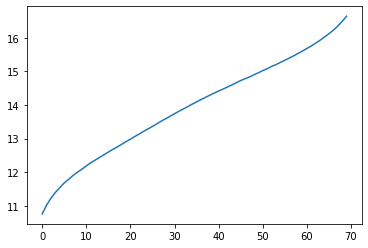

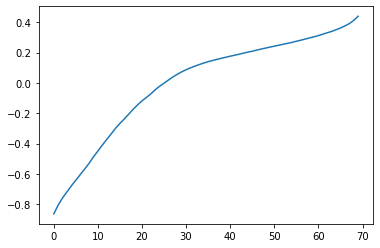

In [344]:
# 70
number_delta = 70
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

100%|███████████████████████████████████████| 2000/2000 [03:59<00:00,  8.35it/s]


-0.0003456023769795849


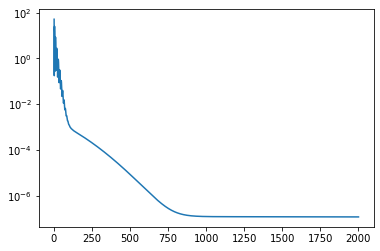

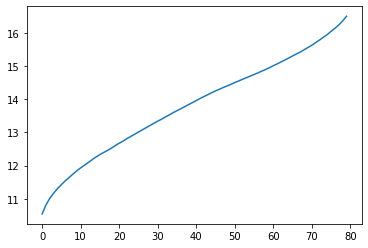

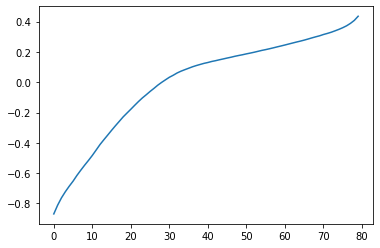

In [347]:
# 80
number_delta = 80
params = give_params(number_delta, key_n)
sort_params = jnp.sort(params)
sp = sort_params.reshape(batch_size,number_delta*2)
print(reduced_partition_function_spinless(params[0],32121,1/2) - reduced_partition_function_spinless(params[0],1/32121,1/2))
x = jnp.mean(sp, axis=0)
plt.figure()
plt.plot(x[:number_delta]) 
plt.figure()
plt.plot(x[number_delta:])

In [63]:
hlist = []
for i in range()
jnp.histogram(params[:,0])

(DeviceArray([  8., 149., 144., 134., 135., 137., 135., 146., 151., 141.],            dtype=float64),
 DeviceArray([-0.21546168975676538 ,  0.007216400834151666,
               0.2298944914250687  ,  0.45257258201598577 ,
               0.6752506726069029  ,  0.8979287631978199  ,
               1.120606853788737   ,  1.343284944379654   ,
               1.565963034970571   ,  1.788641125561488   ,
               2.011319216152405   ], dtype=float64))

In [361]:
x_ = x.reshape((2,80))
reduced_partition_function_spinless(x_,5,1/2)

DeviceArray(0.6039414741898942, dtype=float64)

## Bootstrap with Newton Raphson and Scipy Optimizers

## Using Scipy optimizers

In [2]:
from jaxopt import ScipyRootFinding
from scipy import optimize

## Using newton-raphson

In [10]:
laguerre_deltas = vmap(laguerre_at_x, in_axes = (None, 0), out_axes=1)

c = 12
x = -(c-1)/12

def primal(params: jnp.array) -> jnp.array:
    """
    Crossing equation with unnormalised rhos    
    
    Args:
        params (jnp.array) [deltas, rhos]
    Returns:
        crossing_equation -> float, crossing equation loss
    """
    h = len(params)//2
    deltas = lax.dynamic_slice(params, (0,),(h,)) # split deltas and rhos
    rhos = lax.dynamic_slice(params, (h,),(h,))
    deltas = deltas + x
    lps = laguerre_deltas(2*h -1,deltas) # calculate laguerre at different deltas
    lp0 = laguerre_at_0(2*h-1, x)# calculate laguerre at zero
    rho_lps = jnp.sum(rhos * lps, axis = 1) # rho * lps
    crossing_equation = (1 + rho_lps/lp0) # lp0 + \Sigma rho* lps = 0
    return  crossing_equation


def newton_rap(primal, x0: jnp.array, tol=1e-10, max_iter=2000) -> (jnp.array,jnp.array,float,bool):
    """
    Finds a solution to `primal` using the Newton-Raphson method. 
    Written with jax while loop.

    Args:
        primal (function): function to approximate a solution of
        x0 (jnp.array): Initial guess for the solution vector.
        tol (float): Tolerance for the norm of the residual vector. Default is 1e-6.
        max_iter (int): Maximum number of iterations. Default is 100.

    Returns:
        x (jnp.array,jnp.array,float,bool): Converging parameters (deltas and rhos), number of steps, converges?
    """

    f = primal

    Jf = jit(jacfwd(f))
    Hf = jax.hessian(f)
    s = x0.shape[0]
    hessians = jnp.zeros((2000,s,s,s))
    jacobians = jnp.zeros((2000,s,s))
    
    @jit
    def newton_step(val):
        x, r, n, hessians, jacobians, _ = val # x, f(x), step_number, abort_state
        n = n + 1 
        J = Jf(x)
        hessians = hessians.at[n.astype(int)].set(Hf(x))
        jacobians = jacobians.at[n.astype(int)].set(J)
        r = f(x)
        dx = jnp.linalg.solve(J, -r)
        x1 = x + dx
        abort = jnp.any(jnp.isnan(x1)) # abort if nan is encountered
        return (jnp.where(abort, x, x1), r , n,hessians, jacobians, abort)
    
    def cond(val):
        x, r, n,hessians, jacobians, abort = val
        return (~abort) & (jnp.max(jnp.abs(r)) > tol) & ( n< max_iter) # abort if nan is encountered

    
    return  lax.while_loop(cond, newton_step, (x0, jnp.ones(x0.shape), 0.0, hessians, jacobians, False))  

@jit
def primal_normal(params):
    """
    Crossing equation with normalised rhos 
    
    params -> [deltas, rhos]
    lps -> laguerre polynomials at deltas
    lp0 -> laguerre at 0
    Crossing equation with normalised rhos -> rhos * \sqrt(max(lps))
    """
    h = len(params)//2
    deltas = lax.dynamic_slice(params, (0,),(h,))
    rhos = lax.dynamic_slice(params, (h,),(h,))
    deltas = deltas + x
    lps = laguerre_deltas(2*h -1,deltas)
    maxl = jnp.max(jnp.abs(lps), axis=0)
    lps = lps/jnp.sqrt(maxl)
    lp0 = laguerre_at_0(2*h-1, x)
    rho_lps = jnp.sum(rhos * lps, axis = 1)
    crossing_equation = (1 + rho_lps/lp0)
    return  crossing_equation

@jit
def primal_normal_optim(rhos,deltas):
    """
    Mean squared loss of the crossing equation
    Args:
        rhos (jpn.array(float)) rhos
        deltas (jpn.array(float)) deltas
    Returns:
        Mean square loss (float)
    """
    
    h = len(deltas)
#     deltas = lax.dynamic_slice(params, (0,),(h,))
#     rhos = lax.dynamic_slice(params, (h,),(h,))
    deltas = deltas + x
    lps = laguerre_deltas(2*h -1,deltas)
    maxl = jnp.max(jnp.abs(lps), axis=0)
    lps = lps/jnp.sqrt(maxl)
    lp0 = laguerre_at_0(2*h-1, x)
    rho_lps = jnp.sum(rhos * lps, axis = 1)
    crossing_equation = (1 + rho_lps/lp0)
    return  jnp.linalg.norm(crossing_equation)/h

In [531]:
deltas = jnp.array([2.0350381802830926e+00, 3.1137220531908305e+00,
              4.2770916146359808e+00, 5.5802827105955455e+00,
              7.2134024986546702e+00, 9.1861644193223920e+00,], dtype=float)
rhos = jnp.array([1]*6, dtype=float)

In [532]:
newt_rap_f = partial(newton_rap,primal)

In [533]:
# deltas = jnp.array([2,3.,5.], dtype=float)
out = newt_rap_f(jnp.concatenate((deltas,rhos)))

In [536]:
out[2]
out[-1]

DeviceArray(False, dtype=bool)

In [537]:
[jnp.linalg.det(out[3][i]) for i in range(int(out[2]))]

[DeviceArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float64),
 DeviceArray([1.0460575371836562e+00, 8.1082468996395350e+15,
              4.5040502948576744e+24, 4.9365089023581047e+29,
              4.5344846707229360e+31, 6.0592211971946307e+31,
              4.7446356440224180e+28, 7.9022126665078125e+27,
              2.6309872407780447e+23, 2.8672246703048538e+17,
              2.6754424924336313e+11, 4.6649042741262900e+04],            dtype=float64),
 DeviceArray([1.0460575371836562e+00, 8.1156156276790620e+15,
              4.5165331827967399e+24, 4.9492299103415123e+29,
              4.5526033170104228e+31, 6.0960661541799374e+31,
              4.6508785459446038e+28, 7.9096163599832366e+27,
              2.6481341097384052e+23, 2.8559945911942106e+17,
              2.6897106355336606e+11, 4.5587611686846511e+04],            dtype=float64),
 DeviceArray([1.0460575371836562e+00, 7.5148217658338960e+15,
              3.8607542117195832e+24, 3.8879326546970411e+2

In [529]:
[jnp.linalg.det(out[3][i]) for i in range(int(out[2]))]

[DeviceArray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float64),
 DeviceArray([1.0460575371836562e+00, 7.7117532573388860e+15,
              4.0654824573293908e+24, 4.2182796075137435e+29,
              3.6576929499278181e+31, 4.5983640971574893e+31,
              3.3740989697294811e+28, 5.2402045813331428e+27,
              1.6169294685024004e+23, 1.6199836042690291e+17,
              1.3743161885067387e+11, 2.1424906589637150e+04],            dtype=float64),
 DeviceArray([1.0460575371836562e+00, 7.7168217643619620e+15,
              4.0736261296936443e+24, 4.2261437472159755e+29,
              3.6682702430547701e+31, 4.6185724398495750e+31,
              3.3259115239250889e+28, 5.2437741186507814e+27,
              1.6245411596877149e+23, 1.6153999691674717e+17,
              1.3795923862513147e+11, 2.1070994300893657e+04],            dtype=float64),
 DeviceArray([1.0460575371836562e+00, 7.3667268791227550e+15,
              3.7048594258619636e+24, 3.6504398235761675e+2

In [625]:
def hessian_around_x(v):
    deltas = jnp.array([2.0350381802830926e+00, 3.1137220531908305e+00,
              4.2770916146359808e+00, 5.5802827105955455e+00,
              7.2134024986546702e+00, 9.0861644193223920e+00,], dtype=float)
    deltas = deltas.at[-1].set(v)
    rhos = jnp.array([7.0156142248953335e-01, 1.1793347523661235e-01,
              5.3012136027625152e-03, 7.8741245069605828e-05,
              3.0831266291151847e-07, 1.4004045035709713e-10])
    params = jnp.concatenate((deltas,rhos))
    f = primal
    Jf = jit(jacfwd(f))
    Hf = jax.hessian(f)
    return jnp.linalg.norm(f(params))/12, jnp.abs(jnp.linalg.det(Jf(params))), jnp.abs(jnp.linalg.det(Hf(params)))

In [ ]:
def hessian_around_x_(v):
    deltas = jnp.array([1.0016846077063859e+00, 2.0132352894028078e+00,
              3.0598908737963431e+00, 4.1938732667831005e+00,
              5.5127067425895087e+00, 7.2147620696903632e+00,], dtype=float)
    deltas = deltas.at[-1].set(v)
    rhos = jnp.array([4.6280106792800985e-01, 1.2256423045130404e-02,
              1.4097655836383145e-04, 8.1736939945799935e-07,
              1.6024722350565098e-09, 4.1463710065057395e-13])
    params = jnp.concatenate((deltas,rhos))
    f = primal
    Jf = jit(jacfwd(f))
    Hf = jax.hessian(f)
    return jnp.linalg.norm(f(params))/12, jnp.abs(jnp.linalg.det(Jf(params))), jnp.abs(jnp.linalg.det(Hf(params)))

In [629]:
true_val = 9.0861644193223920
scale = 100
shift = 0.1
xs = random.uniform(keys[1], (100,))*scale + shift
fs,js, hs = vmap(hessian_around_x)(xs)

In [630]:
true_val = 9.0861644193223920
scale = 12
shift = 0.1
xs = random.uniform(keys[1], (100,))*scale + shift
fs,js, hs = vmap(hessian_around_x)(xs)

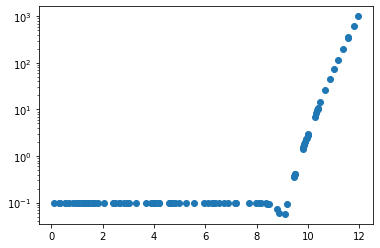

In [631]:
plt.scatter(xs, fs)
plt.yscale("log")

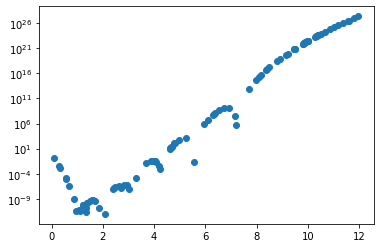

In [632]:
plt.scatter(xs, js)
plt.yscale("log")

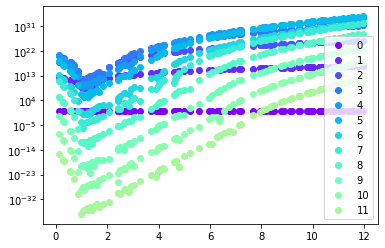

In [633]:
color = iter(cm.rainbow(np.linspace(0, 1, 20)))
for i in range(12):
    col = next(color)
    plt.scatter(xs, hs[:,i], label=f"{i}", color = col)
plt.legend()
plt.yscale("log")

In [634]:
def primal_around_xy(v,w):
    deltas = jnp.array([2.0350381802830926e+00, 3.1137220531908305e+00,
              4.2770916146359808e+00, 5.5802827105955455e+00,
              7.2134024986546702e+00, 9.0861644193223920e+00,], dtype=float)
    deltas = deltas.at[-1].set(v)
    deltas = deltas.at[-2].set(w)
    rhos = jnp.array([7.0156142248953335e-01, 1.1793347523661235e-01,
              5.3012136027625152e-03, 7.8741245069605828e-05,
              3.0831266291151847e-07, 1.4004045035709713e-10])
    params = jnp.concatenate((deltas,rhos))
    f = primal
    return jnp.linalg.norm(f(params))/12

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

true_val_2 = 9.0861644193223920
true_val_1 = 7.2134024986546702
vs = jnp.arange(6,10,0.001)
ws = jnp.arange(6,10,0.001)
f_= vmap(vmap(primal_around_xy, in_axes=(0,None), out_axes=0),in_axes=(None,0), out_axes=0)(vs, ws)




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(vs, ws)

# Plot the surface.
surf = ax.plot_surface(X, Y, f_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [27]:
[jnp.linalg.det(out[4][i]) for i in range(int(out[2]))]

[DeviceArray(0., dtype=float64),
 DeviceArray(1.4288818031067312e+08, dtype=float64),
 DeviceArray(4151.572112989068, dtype=float64),
 DeviceArray(5919.4406498975895, dtype=float64),
 DeviceArray(5813.114487779051, dtype=float64),
 DeviceArray(5813.026686637272, dtype=float64)]

In [29]:
[jnp.linalg.det(out[4][i]) for i in range(int(out[2]))]

[DeviceArray(0., dtype=float64),
 DeviceArray(75015344.94898419, dtype=float64),
 DeviceArray(1904.1247064492063, dtype=float64),
 DeviceArray(9237.557247141496, dtype=float64),
 DeviceArray(6111.321079756201, dtype=float64),
 DeviceArray(5810.2752633577875, dtype=float64),
 DeviceArray(5813.025797222964, dtype=float64)]

In [31]:
[jnp.linalg.det(out[4][i]) for i in range(int(out[2]))]

[DeviceArray(0., dtype=float64),
 DeviceArray(7876468.609372922, dtype=float64),
 DeviceArray(-1217.1154917015199, dtype=float64),
 DeviceArray(-1.4855091570540793, dtype=float64),
 DeviceArray(1.0004645121668654e+40, dtype=float64),
 DeviceArray(-1.0010201358433467e+98, dtype=float64)]

In [8]:
[(jnp.linalg.det(out[-2][i])) for i in range(int(out[-3]))]

[DeviceArray([0., 0., 0., 0., 0., 0.], dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -3.2242604244827479e+05,
              -9.9813211874751784e+06, -1.4969850293826342e+06,
              -1.8627388773027611e+04, -3.1307746751696097e-01],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -3.5867439613697102e+05,
              -1.3643525152654633e+07, -1.7597014335657754e+06,
              -2.2387740111752806e+04, -3.9796875660041275e-01],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -4.0744789288040908e+05,
              -1.8457791099028397e+07, -2.5562432935342533e+06,
              -3.9809836606373960e+04, -2.8085711554715222e-04],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -4.0394564019256085e+05,
              -1.8086186820467286e+07, -2.4913751651027040e+06,
              -3.8248154987867019e+04, -6.9107754690664299e-03],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -4.0393624424761860e+05,
 

In [10]:
[(jnp.linalg.det(out[-2][i])) for i in range(int(out[-3]))]

[DeviceArray([0., 0., 0., 0., 0., 0.], dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -1.3220205674905857e+05,
              -1.3884159914996836e+06, -4.7464645892309301e+04,
              -1.9200250652538596e+01, -4.2347043007164992e-02],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -3.1882364610707597e+05,
              -1.4580155379899802e+07, -7.0167947815780979e+04,
              -2.9730558432310126e+01, -2.5920090917817568e-01],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -9.1690773224006538e+04,
              -7.5365356538146641e+05, -1.1069245846023282e+03,
              -9.2594078519104839e-01, -1.6348428306214638e-03],            dtype=float64),
 DeviceArray([-1.0227695425576850e+00, -8.3466972022810238e+14,
              -8.0195474937807131e+26, -1.6106196185576317e+37,
              -1.3014980593626180e+46, -4.5395710718176794e+53],            dtype=float64),
 DeviceArray([-1.0227695425576850e+000, -2.8560267729276735e+030,

In [11]:
out[0:3]

(DeviceArray([ 1.1609034949883365e+28,  3.3103934697871296e+37,
              -3.6964415305308001e+04, -1.1879012583024100e+30,
              -2.5721798020478706e+22, -8.6923251042511538e+00],            dtype=float64),
 DeviceArray([8.6853606593374968e+059, 6.3067098128267900e+134,
              3.0950414502004146e+209, 1.1045188205759163e+284,
                                  inf,                     nan],            dtype=float64),
 DeviceArray(6., dtype=float64, weak_type=True))

In [181]:
[jnp.sum(jnp.log10(jnp.abs(jnp.linalg.det(out[-2][i])))) for i in range(int(out[-3]))]

[DeviceArray(-inf, dtype=float64),
 DeviceArray(15.860035838932912, dtype=float64),
 DeviceArray(18.410068825121847, dtype=float64),
 DeviceArray(11.073452434028049, dtype=float64),
 DeviceArray(178.8138936379224, dtype=float64),
 DeviceArray(290.1174965477866, dtype=float64),
 DeviceArray(578.5529338415143, dtype=float64),
 DeviceArray(616.8324399576804, dtype=float64)]

In [188]:
jnp.var(jnp.array([float(t) for t in Out[181][1:]]))

DeviceArray(59214.112689100686, dtype=float64)

In [190]:
[jnp.sum(jnp.log10(jnp.abs(jnp.linalg.det(out[-2][i])))) for i in range(int(out[-3]))]

[DeviceArray(-inf, dtype=float64),
 DeviceArray(22.45841717827532, dtype=float64),
 DeviceArray(22.894702980976895, dtype=float64),
 DeviceArray(20.342107601473185, dtype=float64),
 DeviceArray(21.692024128649205, dtype=float64),
 DeviceArray(21.693267890591187, dtype=float64)]

In [15]:
def rhos_optim(rhos, deltas, c, opt_fn, opt_state, steps=100):
    """ Guess rhos, given a good guess for deltas

        Params:
        rho - initial values for rhos (arbitrary)
        deltas - intitialised deltas (fixed)
        opt_fn - optimization function e.g. Adam
        opt_state - initial state

        Returns:
        rhos, losses,  state

    """
    x = -(c-1)/12
    h = len(deltas)
    deltas = deltas + x
    @jit
    def loss_function(rhos): # same as primal_normal
        lps = laguerre_deltas(2*h -1,deltas)
        maxl = jnp.max(jnp.abs(lps), axis=0)
        lps = lps/jnp.sqrt(maxl)
        lp0 = laguerre_at_0(2*h-1, x)
        rho_lps = jnp.sum(rhos * lps, axis = 1)
        crossing_equation = (1 + rho_lps/lp0)
        return jnp.mean((crossing_equation)**2) # mean squared loss

    losses = []
    for _ in tqdm(range(steps)): # optimiser
        loss, grads = jax.value_and_grad(loss_function)(rhos) # loss and gradients calulated 
        updates, opt_state = opt_fn(grads, opt_state) 
        rhos += updates # update rho
        losses.append(loss) 

    return  rhos, jnp.stack(losses), opt_state

In [24]:
def dilation(dnm1,dn, fixed_point = 1, some_point = 0):
    """Calculate scaling factor \epsilon for self-similar function: 
        f(\lambda x) = \lambda^{\epsilon} f(x)
        
        Args:
        dnm1: x
        dn: \lambda x
        fixed_point:
        some_point:
        
        Returns:
        epsilons: \epsilon
    """
    h =  len(dnm1) - some_point if len(dnm1) - some_point> 0 else len(dnm1)
    lambda_= (h+1 - fixed_point)/(h - fixed_point)
    epsilon = jnp.log((dn[h+1]-dn[fixed_point-1])/(dnm1[h] - dnm1[fixed_point-1]))/jnp.log(lambda_) 
    return epsilon

def guess_generator(dnm1, dn, fixed_point=1):
    """generate guess dnp1 from dnm1 and dn
        
        Args:
        dnm1: x
        dn: \lambda x
        fixed_point:
        
        Returns:
        guess: dnp1
    """
    
    epsilon = dilation(dnm1, dn, fixed_point,0)
    no_points = 1000
    x_range = jnp.linspace(1.0,int(len(dn)),(int(len(dn))- 1)*no_points)
    
    x_discrete = jnp.arange(1, int(len(dn)) + 1, dtype = float)
    
    yn = jnp.interp(x_range, x_discrete, dn)
    
    lambda_ = (len(dn))/(len(dn) - 1)
    
    scale = lambda_ ** epsilon
    
    ynp1 = (yn - yn[0]) * scale + yn[0]
    sample_rate = int((no_points-1)/ lambda_)
    # Correction added to guess
    # cors = jnp.array([0.007866155585121012, 0.00954485954845927 , 0.014117004802336118,
    #    0.023951187818932042, 0.046797643955721294, 0.10137571941656    ])
    guess = ynp1[::sample_rate]
    # guess= guess.at[-6:].add(cors)
    return guess

number of deltas = 3
number of deltas = 4
number of deltas = 5
number of deltas = 6
number of deltas = 7
number of deltas = 8
nan found delta 8
guess
[1.012957173496282 2.248484536319232 3.493133677144044 4.740616658233486
 5.975282326693441 7.225551649359862 8.469928860895001 9.70752723648185
 1.                1.                1.                1.
 1.                1.                1.                1.               ]
params
[ 1.0966179031868748e+10  7.9730964533663361e+10  2.1083351984346997e+11
  1.0924948925301193e+11 -3.0953820930611432e+01 -1.7656114434591198e+10
 -1.6141547987848804e+11 -2.7874706153907349e+11 -2.9303697154101934e+09
 -1.8943468133937190e+09 -6.1130329732364081e+07 -4.9309613602463203e+05
  1.6543612251060553e-23  4.8413051413031011e-01  3.5621150473750490e-01
  2.0098262913920985e-03]


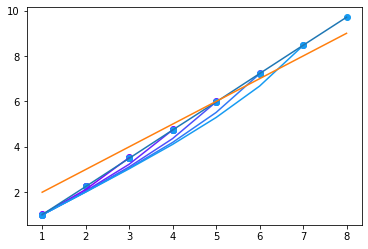

In [11]:
laguerre_deltas = vmap(laguerre_at_x, in_axes = (None, 0), out_axes=1)
color = iter(cm.rainbow(np.linspace(0, 1, 20)))

c = 4
x = -(c-1)/12

list_losses = []
list_params = []
list_guesses = []
deltas = jnp.array([2.12, 3.43, 5.13])
a_mus = jnp.ones(deltas.shape, dtype = float)*1
params = jnp.array([deltas,a_mus])
params = params.flatten()

list_guesses.append(params)
rng = random.PRNGKey(1)
keys = random.split(rng, 2)
nr_primal = partial(newton_rap,primal)
for p in range(4,12):
    col = next(color)
    print(f"number of deltas = {p-1}")
    
    
    guess = params    
    params, *others = nr_primal(x0 = params)
        
        
    if others[-1]:
        print(f"nan found delta {p-1}")
        print("guess")
        print(guess)
        print("params")
        print(params)
        break
        
    list_params.append(params)
    list_losses.append(primal(params))
    
    
    r = p-2
    k = 1
    
    h = len(params)//2
    deltas = lax.dynamic_slice(params, (0,),(h,))
    
    x_ind = jnp.arange(1,p, dtype= float)
    plt.plot(x_ind,deltas, color=col)
    
    amus = jnp.ones(p, dtype=float)*k
    scale = (deltas[r] - deltas[0])/(r)
    
    keys = random.split(keys[1],2)
    
    
    new_deltas = (scale * (jnp.arange(p)) + deltas[0] ) + random.uniform(keys[1], jnp.arange(p).shape) * 0.1/p    
    
   
    x_ind = jnp.arange(1,p+1, dtype= float)
    plt.scatter(x_ind,new_deltas, color = col)
    params = jnp.array([new_deltas,amus]).flatten()
    list_guesses.append(params)
    if p == 11:
        print("guess")
        print(params)

plt.plot(x_ind,new_deltas)
plt.plot(x_ind, 1 + x_ind)

In [12]:
list_params

[DeviceArray([1.0158511490826954e+00, 2.1196816083979155e+00,
              3.5215858665828543e+00, 4.5951934687671403e-01,
              9.2919160051298470e-03, 2.6964383324894495e-05],            dtype=float64),
 DeviceArray([1.0069956892523999e+00, 2.0537160120181941e+00,
              3.2322754035337184e+00, 4.7432510539667954e+00,
              4.6167666469849589e-01, 1.1079017333260974e-02,
              7.7606394878914712e-05, 8.7874929673402223e-08],            dtype=float64),
 DeviceArray([1.0033343667906682e+00, 2.0259624038981561e+00,
              3.1148869458219295e+00, 4.3630179569557122e+00,
              5.9760933140553298e+00, 4.6246725122370214e-01,
              1.1882499110274983e-02, 1.1708826782586571e-04,
              4.1648452223277569e-07, 2.1143898677039670e-10],            dtype=float64),
 DeviceArray([1.0016846077063859e+00, 2.0132352894028078e+00,
              3.0598908737963431e+00, 4.1938732667831005e+00,
              5.5127067425895087e+00, 7.21476206

In [154]:
list_guesses

[DeviceArray([2.12, 3.43, 5.13, 1.  , 1.  , 1.  ], dtype=float64),
 DeviceArray([2.1467345642628493, 3.636151017591032 , 5.144902525677382 ,
              6.644776315099856 , 1.                , 1.                ,
              1.                , 1.                ], dtype=float64),
 DeviceArray([2.0841683015733015, 3.5535620922139923, 5.009391134090036 ,
              6.46225073142989  , 7.917785494874783 , 1.                ,
              1.                , 1.                , 1.                ,
              1.                ], dtype=float64),
 DeviceArray([2.0610914827542266, 3.4885496831637846, 4.913585758028263 ,
              6.3558612074573   , 7.771210359921089 , 9.209656566834882 ,
              1.                , 1.                , 1.                ,
              1.                , 1.                , 1.                ],            dtype=float64),
 DeviceArray([ 2.0362048573065437,  3.4594606663369842,
               4.860270346851098 ,  6.2720618072411085,
     

In [25]:
list_params_n = []
list_deltas=[]
list_guesses = []
c  = 4
#deltas at 10
# deltas_nm1 = jnp.array([2.0087250774670635e+00, 3.0284738337579089e+00,
#               4.0702579984187093e+00, 5.1489830905152969e+00,
#               6.2846424950416377e+00, 7.5030369320194046e+00,
#               8.8383108750694248e+00, 1.0340822370332926e+01,
#               1.2100429543282575e+01, 1.4340733644624255e+01])

# #delta at 11
# deltas_n = jnp.array([ 2.0087250774670684,  3.003572694143946 ,
#               4.0170404711910646,  5.05977751818666  ,
#               6.145403599576878 ,  7.290835270242067 ,
#               8.517198395370421 ,  9.8520027755382   ,
#              11.333659047501556 , 13.100298554534404 ,
#              15.602738195447228])

# a_mus = jnp.array([9.3752351008611274e+00, 4.4929261201295596e+01,
#        7.2318721831577193e+01, 6.3074912091117852e+01,
#        4.3204885219588775e+01, 2.1197389391231862e+01,
#        7.1262995497691684e+00, 1.8737659240062021e+00,
#        3.0516249443686172e-01, 3.6314089832267180e-02,
#        5.1417535858557049e-04])
deltas_nm1 = list_params[-2][:len(list_params[-2])//2]
deltas_n = list_params[-1][:len(list_params[-1])//2]
deltas_g = deltas_n
deltas_n = deltas_nm1
adam = optax.adam(learning_rate=0.2)
a_mus = jnp.ones(deltas_g.shape, dtype = float) * 1
h = len(deltas_g)
nr_primal_normal = partial(newton_rap,primal_normal)
for p in range(11, 40):
    print(f"run {p}")
    
    a_mus_ = jnp.ones(deltas_g.shape, dtype = float) * 1
    a_mus = a_mus_.at[0:h].set(a_mus)
    if p < 25:
        a_mus, losses, _ = rhos_optim(a_mus, deltas_g, c, opt_fn=adam.update, opt_state=adam.init(a_mus), steps=2000)
    else:
        res = optimize.minimize(primal_normal_optim, a_mus, args=(deltas_g), method="Nelder-Mead", tol=1e-15, options={"maxiter": 5000, "xatol": 1e-15}) 
        a_mus = res.x

    params = jnp.array([deltas_g,a_mus])
    params = params.flatten()

    params, *others = nr_primal_normal(params)

    if not others[-1]: # if converges
        x = -(c-1)/12
        list_params_n.append(params)
        deltas_nm1 = deltas_n
        h = len(params)//2
        deltas_n = lax.dynamic_slice(params, (0,),(h,))
        list_deltas.append(deltas_n)
        print(primal_normal(params))
    else:
        print("aborted due to nan")
        break
        
    deltas_g = guess_generator(deltas_nm1, deltas_n, fixed_point=1) #+ jnp.arange(p+1)/(3*p)
    list_guesses.append(deltas_g)
    print(f"new guess \n{deltas_g}")


run 11


100%|██████████| 2000/2000 [00:05<00:00, 373.04it/s]


[ 0.0000000000000000e+00  1.1102230246251565e-16  0.0000000000000000e+00
  0.0000000000000000e+00  0.0000000000000000e+00  2.2204460492503131e-16
  4.4408920985006262e-16 -4.4408920985006262e-16 -1.3322676295501878e-15
 -4.4408920985006262e-16  0.0000000000000000e+00  0.0000000000000000e+00
 -2.2204460492503131e-16 -4.4408920985006262e-16]
new guess 
[1.0008911077231026 2.006041624653802  3.0271436874716917
 4.084634715250448  5.212435959448474  6.4600417036237925
 7.90573891920658   9.687964329377357 ]
run 12


100%|██████████| 2000/2000 [00:05<00:00, 373.65it/s]


[-2.2204460492503131e-16  1.1102230246251565e-16  0.0000000000000000e+00
  0.0000000000000000e+00  3.3306690738754696e-16 -2.2204460492503131e-16
 -6.6613381477509392e-16 -2.2204460492503131e-16  0.0000000000000000e+00
 -2.2204460492503131e-16  0.0000000000000000e+00  0.0000000000000000e+00
  7.7715611723760958e-16  2.2204460492503131e-16 -2.2204460492503131e-16
 -6.6613381477509392e-16]
new guess 
[ 1.0004893715327567  2.0033475413220687  3.0154182620715595
  4.049805706020494   5.130009949562354   6.290353800246503
  7.580644610709943   9.080845254237143  10.938716681200868 ]
run 13


100%|██████████| 2000/2000 [00:05<00:00, 366.09it/s]


[ 0.0000000000000000e+00  1.1102230246251565e-16 -2.2204460492503131e-16
  0.0000000000000000e+00  4.4408920985006262e-16  2.2204460492503131e-16
  0.0000000000000000e+00  2.2204460492503131e-16  6.6613381477509392e-16
  7.7715611723760958e-16  3.3306690738754696e-16 -6.6613381477509392e-16
 -1.7763568394002505e-15 -2.2204460492503131e-15 -2.4424906541753444e-15
 -1.1102230246251565e-15  1.2212453270876722e-15  1.4432899320127035e-15]
new guess 
[ 1.0002773499279907  2.0019243273393776  3.008975878568096
  4.029713600703263   5.080150535988842   6.184839904538988
  7.378811601631137   8.711920994617705  10.263666208837954
 12.191344556017926 ]
run 14


100%|██████████| 2000/2000 [00:05<00:00, 380.12it/s]


[ 0.0000000000000000e+00 -2.2204460492503131e-16 -2.2204460492503131e-16
  4.4408920985006262e-16 -2.2204460492503131e-16 -2.2204460492503131e-16
  4.4408920985006262e-16  2.2204460492503131e-16  4.4408920985006262e-16
  1.2212453270876722e-15  3.3306690738754696e-16 -6.6613381477509392e-16
 -6.6613381477509392e-16 -2.2204460492503131e-16 -6.6613381477509392e-16
 -1.5543122344752192e-15 -2.2204460492503131e-15 -2.4424906541753444e-15
 -2.6645352591003757e-15 -3.5527136788005009e-15]
new guess 
[ 1.0001614718907599  2.0009438658842957  3.0049488303853638
  4.017377556743922   5.048936719960445   6.11714347943976
  7.247715651439771   8.475553741032387   9.849406571545924
 11.449354858839659  13.441616234094317 ]
run 15


100%|██████████| 2000/2000 [00:05<00:00, 371.57it/s]


[ 2.2204460492503131e-16  3.3306690738754696e-16  0.0000000000000000e+00
 -4.4408920985006262e-16  0.0000000000000000e+00  2.2204460492503131e-16
  6.6613381477509392e-16  2.2204460492503131e-16  0.0000000000000000e+00
  2.2204460492503131e-16  0.0000000000000000e+00 -2.2204460492503131e-16
  3.3306690738754696e-16  3.3306690738754696e-16 -2.2204460492503131e-16
 -1.1102230246251565e-15 -1.5543122344752192e-15 -1.9984014443252818e-15
 -2.4424906541753444e-15 -2.8865798640254070e-15 -2.6645352591003757e-15
 -3.1086244689504383e-15]
new guess 
[ 1.0000962293382831  2.0003424690619944  3.0025428795971933
  4.009968758783129   5.029688351427623   6.074023310511004
  7.162025689515874   8.319662892791902   9.58113817273538
 10.994743449025671  12.64050703536245   14.69327400392693  ]
run 16


100%|██████████| 2000/2000 [00:05<00:00, 380.94it/s]


[-4.4408920985006262e-16  4.4408920985006262e-16  0.0000000000000000e+00
 -4.4408920985006262e-16 -2.2204460492503131e-16 -2.2204460492503131e-16
 -1.1102230246251565e-15 -1.1102230246251565e-15 -8.8817841970012523e-16
 -2.2204460492503131e-16  2.2204460492503131e-16  2.2204460492503131e-16
  0.0000000000000000e+00 -2.2204460492503131e-16 -8.8817841970012523e-16
 -1.3322676295501878e-15 -1.3322676295501878e-15 -2.2204460492503131e-16
  9.9920072216264089e-16  1.9984014443252818e-15  2.3314683517128287e-15
 -4.4408920985006262e-16 -3.5527136788005009e-15 -3.9968028886505635e-15]
new guess 
[ 1.0000585371620854  1.9994089169553175  2.9999622300288777
  4.0037835302420755  5.015495630820816   6.04360305010923
  7.10204379464696    8.21050345705616    9.394707889810578
 10.68810480966085   12.13783842711137   13.823647806334643
 15.932341137732655 ]
run 17


100%|██████████| 2000/2000 [00:05<00:00, 380.82it/s]


[ 0.0000000000000000e+00  1.1102230246251565e-16 -2.2204460492503131e-16
 -4.4408920985006262e-16 -4.4408920985006262e-16 -4.4408920985006262e-16
 -6.6613381477509392e-16 -4.4408920985006262e-16 -4.4408920985006262e-16
  0.0000000000000000e+00  5.5511151231257827e-16  8.8817841970012523e-16
  7.7715611723760958e-16  0.0000000000000000e+00 -8.8817841970012523e-16
 -1.1102230246251565e-15 -1.1102230246251565e-15 -1.3322676295501878e-15
 -2.8865798640254070e-15 -3.3306690738754696e-15 -1.7763568394002505e-15
 -2.2204460492503131e-16  2.2204460492503131e-16 -8.8817841970012523e-16
 -8.8817841970012523e-16 -8.8817841970012523e-16]
new guess 
[ 1.0000362633767292  1.9998589639920143  3.000435651402272
  4.00308667912773    5.010848446144441   6.029556462963043
  7.069323414158484   8.145165128574028   9.277196046429339
 10.490830432972253  11.818759182895503  13.30820861309321
 15.040589836103146  17.204856305759066 ]
run 18


100%|██████████| 2000/2000 [00:05<00:00, 379.67it/s]


[ 0.0000000000000000e+00  0.0000000000000000e+00  0.0000000000000000e+00
  4.4408920985006262e-16  6.6613381477509392e-16  4.4408920985006262e-16
 -2.2204460492503131e-16 -2.2204460492503131e-16  0.0000000000000000e+00
  0.0000000000000000e+00  0.0000000000000000e+00 -4.4408920985006262e-16
 -2.2204460492503131e-16  1.1102230246251565e-15  2.3314683517128287e-15
  2.7755575615628914e-15  1.6653345369377348e-15  3.3306690738754696e-16
  0.0000000000000000e+00 -2.2204460492503131e-16  3.3306690738754696e-16
  8.8817841970012523e-16 -2.2204460492503131e-16 -1.1102230246251565e-15
 -8.8817841970012523e-16  9.9920072216264089e-16  2.9976021664879227e-15
  3.4416913763379853e-15]
new guess 
[ 1.0000228346904674  1.9991947582418617  2.9988448215020593
  3.999821558581227   5.004112778137251   6.015665027534307
  7.04164848287323    8.093294253167192   9.186305191901953
 10.340679050880043  11.581057460944718  12.939396375663536
 14.462261963536625  16.230874932875455  18.4455165936252   ]
run

100%|██████████| 2000/2000 [00:05<00:00, 379.68it/s]


[ 0.0000000000000000e+00 -4.4408920985006262e-16  0.0000000000000000e+00
  0.0000000000000000e+00  0.0000000000000000e+00  4.4408920985006262e-16
  1.1102230246251565e-16  0.0000000000000000e+00  0.0000000000000000e+00
  4.4408920985006262e-16 -4.4408920985006262e-16 -1.1102230246251565e-15
 -1.1102230246251565e-15 -4.4408920985006262e-16 -1.3322676295501878e-15
 -1.5543122344752192e-15 -8.8817841970012523e-16  0.0000000000000000e+00
  9.9920072216264089e-16  1.3322676295501878e-15  9.9920072216264089e-16
  6.6613381477509392e-16  4.4408920985006262e-16 -2.2204460492503131e-16
 -8.8817841970012523e-16 -2.2204460492503131e-15 -2.6645352591003757e-15
 -2.6645352591003757e-15 -3.1086244689504383e-15 -3.5527136788005009e-15]
new guess 
[ 1.0000145922388417  1.999360255025807   2.9990137003730393
  3.99952723003548    5.002213037297031   6.009741463735695
  7.027155790869777   8.062759818149086   9.128761529404674
 10.24119665994819   11.419741140927554  12.688449313947618
 14.0786827030291

100%|██████████| 2000/2000 [00:05<00:00, 377.71it/s]


[ 6.6613381477509392e-16  0.0000000000000000e+00  0.0000000000000000e+00
 -4.4408920985006262e-16 -2.2204460492503131e-16 -6.6613381477509392e-16
 -2.2204460492503131e-16  2.2204460492503131e-16  8.8817841970012523e-16
  4.4408920985006262e-16  3.3306690738754696e-16 -4.4408920985006262e-16
 -4.4408920985006262e-16 -6.6613381477509392e-16 -1.3322676295501878e-15
 -6.6613381477509392e-16  1.1102230246251565e-16 -4.4408920985006262e-16
 -2.8865798640254070e-15 -3.3306690738754696e-15 -3.1086244689504383e-15
 -2.8865798640254070e-15 -2.8865798640254070e-15 -1.7763568394002505e-15
 -4.4408920985006262e-16  9.9920072216264089e-16  1.3322676295501878e-15
  1.3322676295501878e-15  2.2204460492503131e-16 -3.1086244689504383e-15
 -6.4392935428259079e-15 -6.8833827526759706e-15]
new guess 
[ 1.0000094507155681  1.999114543194145   2.9984200180973914
  3.998288401832194   4.999589679302483   6.004126204471078
  7.015405356906583   8.039455345291284   9.08559655461641
 10.166617531435458  11.29854

100%|██████████| 2000/2000 [00:05<00:00, 367.58it/s]


[ 2.2204460492503131e-16 -2.2204460492503131e-16  0.0000000000000000e+00
  0.0000000000000000e+00 -2.2204460492503131e-16  0.0000000000000000e+00
  7.7715611723760958e-16 -2.2204460492503131e-16 -4.4408920985006262e-16
  0.0000000000000000e+00  5.5511151231257827e-16  3.3306690738754696e-16
 -8.8817841970012523e-16 -1.5543122344752192e-15 -8.8817841970012523e-16
 -1.9984014443252818e-15 -3.3306690738754696e-15 -2.2204460492503131e-15
  4.4408920985006262e-16  1.7763568394002505e-15  1.1102230246251565e-15
 -4.4408920985006262e-16 -1.5543122344752192e-15 -8.8817841970012523e-16
 -4.4408920985006262e-16 -1.7763568394002505e-15 -2.6645352591003757e-15
 -3.1086244689504383e-15 -2.8865798640254070e-15 -2.2204460492503131e-15
 -1.1102230246251565e-15  1.6653345369377348e-15  4.8849813083506888e-15
  5.6621374255882984e-15]
new guess 
[ 1.0000061961759195  1.9994064000340748  2.9989387067825763
  3.9988438403711446  4.99970408214831    6.002742092468319
  7.010392901808743   8.026992046642507

100%|██████████| 2000/2000 [00:05<00:00, 369.71it/s]


[ 0.0000000000000000e+00  1.1102230246251565e-16  0.0000000000000000e+00
  0.0000000000000000e+00  3.3306690738754696e-16 -6.6613381477509392e-16
 -1.1102230246251565e-15  5.5511151231257827e-16  8.8817841970012523e-16
  5.5511151231257827e-16  2.2204460492503131e-16 -8.8817841970012523e-16
 -1.3322676295501878e-15 -8.8817841970012523e-16  2.2204460492503131e-16
  8.8817841970012523e-16  2.2204460492503131e-16 -1.1102230246251565e-15
 -8.8817841970012523e-16  1.4432899320127035e-15  2.3314683517128287e-15
 -2.2204460492503131e-16 -1.5543122344752192e-15 -1.1102230246251565e-15
 -4.4408920985006262e-16 -2.2204460492503131e-16  4.4408920985006262e-16
  8.8817841970012523e-16  1.2212453270876722e-15  2.2204460492503131e-15
  2.8865798640254070e-15  3.4416913763379853e-15  3.2196467714129540e-15
  2.1094237467877974e-15  1.1102230246251565e-15  1.3322676295501878e-15]
new guess 
[ 1.000004108345848   1.9990791497230238  2.9982420892539245
  3.9976539295363946  4.9977062882959125  5.9992293

100%|██████████| 2000/2000 [00:05<00:00, 363.63it/s]


[-2.2204460492503131e-16  1.1102230246251565e-16  2.2204460492503131e-16
  4.4408920985006262e-16  3.3306690738754696e-16  0.0000000000000000e+00
 -4.4408920985006262e-16  2.2204460492503131e-16  2.2204460492503131e-16
 -4.4408920985006262e-16 -1.3322676295501878e-15 -1.7763568394002505e-15
 -8.8817841970012523e-16  7.7715611723760958e-16  1.5543122344752192e-15
  2.9976021664879227e-15  3.2196467714129540e-15  3.1086244689504383e-15
  9.9920072216264089e-16 -6.6613381477509392e-16 -1.1102230246251565e-15
 -4.4408920985006262e-16 -4.4408920985006262e-16 -1.5543122344752192e-15
 -1.3322676295501878e-15 -8.8817841970012523e-16 -6.6613381477509392e-16
 -4.4408920985006262e-16 -4.4408920985006262e-16 -4.4408920985006262e-16
 -1.3322676295501878e-15 -1.7763568394002505e-15 -1.7763568394002505e-15
 -1.9984014443252818e-15 -2.2204460492503131e-15 -2.8865798640254070e-15
 -3.7747582837255322e-15 -4.4408920985006262e-15]
new guess 
[ 1.000002752444669   1.999123904910242   2.9983041682477496
  

100%|██████████| 2000/2000 [00:05<00:00, 370.74it/s]


[ 0.0000000000000000e+00 -4.4408920985006262e-16  2.2204460492503131e-16
  6.6613381477509392e-16  5.5511151231257827e-16  5.5511151231257827e-16
 -2.2204460492503131e-16  2.2204460492503131e-16 -4.4408920985006262e-16
 -8.8817841970012523e-16 -4.4408920985006262e-16  3.3306690738754696e-16
  0.0000000000000000e+00  7.7715611723760958e-16  1.9984014443252818e-15
  2.3314683517128287e-15  1.8873791418627661e-15  1.9984014443252818e-15
  1.7763568394002505e-15  0.0000000000000000e+00 -6.6613381477509392e-16
 -4.4408920985006262e-16  0.0000000000000000e+00  4.4408920985006262e-16
  1.9984014443252818e-15  2.6645352591003757e-15  2.1094237467877974e-15
  8.8817841970012523e-16  6.6613381477509392e-16  1.3322676295501878e-15
  5.5511151231257827e-16 -1.3322676295501878e-15 -1.7763568394002505e-15
  8.8817841970012523e-16  5.5511151231257827e-15  7.9936057773011271e-15
  6.7723604502134549e-15  3.8857805861880479e-15  2.8865798640254070e-15
  2.8865798640254070e-15]
new guess 
[ 1.0000018618

[]

In [19]:
list_params_n = []
list_deltas=[]
list_guesses = []
c = 12
#deltas at 10
deltas_nm1 = jnp.array([2.0087250774670635e+00, 3.0284738337579089e+00,
              4.0702579984187093e+00, 5.1489830905152969e+00,
              6.2846424950416377e+00, 7.5030369320194046e+00,
              8.8383108750694248e+00, 1.0340822370332926e+01,
              1.2100429543282575e+01, 1.4340733644624255e+01])

#delta at 11
deltas_n = jnp.array([ 2.0087250774670684,  3.003572694143946 ,
              4.0170404711910646,  5.05977751818666  ,
              6.145403599576878 ,  7.290835270242067 ,
              8.517198395370421 ,  9.8520027755382   ,
             11.333659047501556 , 13.100298554534404 ,
             15.602738195447228])

# a_mus = jnp.array([9.3752351008611274e+00, 4.4929261201295596e+01,
#        7.2318721831577193e+01, 6.3074912091117852e+01,
#        4.3204885219588775e+01, 2.1197389391231862e+01,
#        7.1262995497691684e+00, 1.8737659240062021e+00,
#        3.0516249443686172e-01, 3.6314089832267180e-02,
#        5.1417535858557049e-04])

deltas_g = deltas_n
deltas_n = deltas_nm1
adam = optax.adam(learning_rate=0.2)
a_mus = jnp.ones(deltas_g.shape, dtype = float) * 1
h = len(deltas_g)
nr_primal_normal = partial(newton_rap,primal_normal)
for p in range(11, 40):
    print(f"run {p}")
    
    a_mus_ = jnp.ones(deltas_g.shape, dtype = float) * 1
    a_mus = a_mus_.at[0:h].set(a_mus)
    if p < 25:
        a_mus, losses, _ = rhos_optim(a_mus, deltas_g,c, opt_fn=adam.update, opt_state=adam.init(a_mus), steps=2000)
    else:
        res = optimize.minimize(primal_normal_optim, a_mus, args=(deltas_g), method="Nelder-Mead", tol=1e-15, options={"maxiter": 5000, "xatol": 1e-15}) 
        a_mus = res.x

    params = jnp.array([deltas_g,a_mus])
    params = params.flatten()

    params, *others = primal_normal(x0 = params)

    if not others[-1]: # if converges
        c = 12
        x = -(c-1)/12
        list_params_n.append(params)
        deltas_nm1 = deltas_n
        h = len(params)//2
        deltas_n = lax.dynamic_slice(params, (0,),(h,))
        list_deltas.append(deltas_n)
        print(primal_normal(params))
    else:
        print("aborted due to nan")
        break
        
    deltas_g = guess_generator(deltas_nm1, deltas_n, fixed_point=1) #+ jnp.arange(p+1)/(3*p)
    list_guesses.append(deltas_g)
    print(f"new guess \n{deltas_g}")


run 11


TypeError: rhos_optim() missing 1 required positional argument: 'c'

IndexError: list index out of range

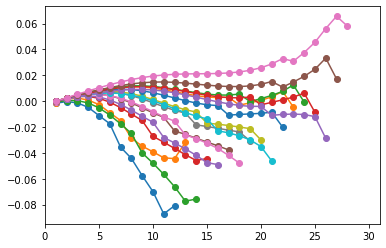

In [19]:
#Guess - True value

for n in range(19):
    cor = list_deltas[n+1] - list_guesses[n]
    plt.plot(np.arange(1,13+n),cor, "o-")
    plt.xlim(0,15+n)

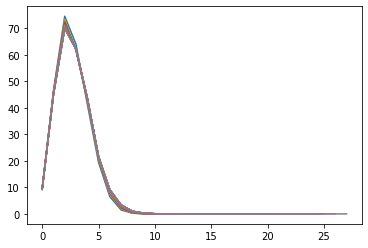

In [21]:
# Plot for rhos at different steps
for i, rho in enumerate(list_params_n):
    h = len(rho) // 2
    rho = rho[h:]
    plt.plot(rho)

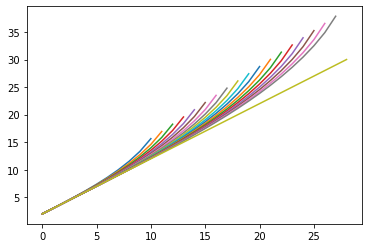

In [22]:
#Deltas vs index
list_deltas
for delta in list_deltas:
    plt.plot(delta)
xrange = np.arange(1,30)
plt.plot(1+xrange)

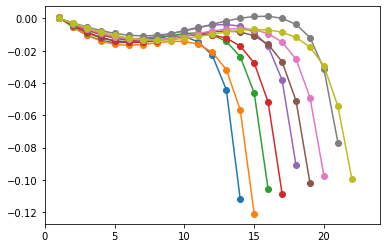

In [20]:
# Comparing guess from guess_generator and true value

def dilation(dnm1,dn, fixed_point = 1, some_point = 0):
    h =  len(dnm1) - some_point if len(dnm1) - some_point> 0 else len(dnm1)
    lambda_= (h+1 - fixed_point)/(h - fixed_point)
    epsilon = jnp.log((dn[h+1]-dn[fixed_point-1])/(dnm1[h] - dnm1[fixed_point-1]))/jnp.log(lambda_) 
    return epsilon

def guess_generator(dnm1, dn, fixed_point=1):
    
    epsilon = dilation(dnm1, dn, fixed_point,3)
    no_points = 1000
    x_range = jnp.linspace(1.0,int(len(dn)),(int(len(dn))- 1)*no_points)
    
    x_discrete = jnp.arange(1, int(len(dn)) + 1, dtype = float)
    
    yn = jnp.interp(x_range, x_discrete, dn)
    
    lambda_ = (len(dn))/(len(dn) - 1)
    
    scale = lambda_ ** epsilon
    
    ynp1 = (yn - yn[0]) * scale + yn[0]
    sample_rate = int((no_points-1)/ lambda_)
    guess = ynp1[::sample_rate]

    return guess

corrections = []
for n in range(1,10):
    guess = guess_generator(list_deltas[n], list_deltas[n+1], fixed_point=1)
    cor = guess - list_deltas[n+2]
    corrections.append(cor[-6:])
    plt.plot(np.arange(1,14+n),cor, "o-")
    plt.xlim(0,15+n)

In [410]:
fun = lambda x: jnp.array([x[0]**2 + x[1]**2, x[0]/x[1]])

In [407]:
Jf = jit(jacfwd(fun))
Hf = jax.hessian(fun)

In [411]:
fun(jnp.array([1.,2.]))

DeviceArray([5. , 0.5], dtype=float64)

In [422]:
Jf(jnp.array([1.,2.])

DeviceArray([[ 2.  ,  4.  ],
             [ 0.5 , -0.25]], dtype=float64)

In [433]:
Hf(jnp.array([1.,2.]))

DeviceArray([[[ 2.  ,  0.  ],
              [ 0.  ,  2.  ]],

             [[ 0.  , -0.25],
              [-0.25,  0.25]]], dtype=float64)